# Vocab Analysis 
## Section 4: Visualize the Data

### 1. Import Libraries

In [18]:
import pandas as pd
import numpy as np
import sqlite3
import json
from datetime import datetime, timedelta, date
import time

In [21]:
from matplotlib import pyplot as plt # import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [22]:
# %load da_vocab_utility.py
# TDD backbone assertion to confirm a function call returns the desired result
def assertEquals(actual, expected, desc):
    assert(actual==expected), desc + " result: " + str(actual) + ", expected: " + str(expected)
    return "OK"
	
# check that two lists have the same contents
def lists_equal(a,b):
    return (a == b).all()
	

# shallow check (by row) for duplicates
def has_dupes(df_in):
    dupe = df_in.duplicated()
    return df_in.loc[dupe].shape[0] != 0
	
def print_line_break():
    print("-"*75)
	
def print_before_after(b, a, t=""):
    if t != "":
        print_line_break()
        print(t)
    print_line_break()
    print("Before: " + str(b))
    print_line_break()
    print("After: " + str(a))
    print_line_break()
	
def time_it(func, *args, **kwargs):
    start = time.time()
    func(*args, **kwargs)
    end = time.time()
    # https://stackoverflow.com/questions/8885663/how-to-format-a-floating-number-to-fixed-width-in-python
    print("{:.0f}".format((end - start)*1000) + " miliseconds")
	
def has_dupe_terms(df_in):
    location = df_in['Term'].duplicated()
    return df_in.loc[location].shape[0] != 0
	
def get_rows_by_value_in_col(df_in, value, col):
    return df_in.loc[df_in[col]==value]
	
# Converts a tag string to a list to a set back to a string (this removes the duplicates)
def remove_dupes(t):
    temp = list(set(t.lower().split()))
    return ' '.join(temp) # return as string
	
# determines if an individual tag substring exists in a larger tags list string
def tag_exists(tags, tag):
    return 1 if tag in tags.split() else 0
	
def is_blank (s):
    return not (s and s.strip())
	
def get_frame_of_cards_by_term(df, t):
    return df.loc[df['Term']==t]
	


### 2. Import Data

In [23]:
# import notes
notes_location = "datasets/df_notes_015_final_section_2.csv"
df_notes = pd.read_csv(notes_location, index_col=[0])

# import cards
cards_location = "datasets/df_cards_009_mid_section_2.csv"
df_cards = pd.read_csv(cards_location, index_col=[0])

In [24]:
df_notes.columns.values

array(['nid', 'tags', 'Term', 'Yomi1', 'NoteCreated', 'LastModified',
       'commonword', 'clothing', 'animal', 'body', 'food', 'place',
       'textbook', 'college', 'fromdict', 'fromexam', 'n1', 'n2', 'n3',
       'n4', 'n5', 'katakana', 'hiragana', 'kanji', 'adv', 'adj', 'noun',
       'verb', 'nonconvo', 'convo', 'metalite', 'hasVisual', 'hasAudio',
       'hasMultiMeaning', 'hasMultiReading', 'hasSimilar', 'hasHomophone',
       'hasAltForm', 'hasRichExamples', 'TermLen', 'Syllables',
       'TermLenGroup', 'SyllablesGroup', 'jlpt_lvl_d', 'script',
       'mean_ivl', 'mean_factor', 'mean_reps', 'mean_lapses',
       'total_reps', 'total_lapses', 'hasListenCard', 'hasPictureCard',
       'hasReadCard', 'hasTranslateCard', 'mean_note_efficiency',
       'mean_note_durability', 'adj_note_durability'], dtype=object)

In [25]:
df_cards.columns.values

array(['cid', 'nid', 'ivl', 'factor', 'reps', 'lapses', 'CardCreated',
       'DueDate', 'c_ivl_q', 'c_factor_q', 'CardType_listen',
       'CardType_look', 'CardType_read', 'CardType_recall', 'cardtype',
       'efficiency', 'durability'], dtype=object)

# Inspect the correlation between syllables and mean durability

In [ ]:
# Create a Figure #fig = plt.figure()
# Set up Axes #ax = fig.add_subplot(111)

In [77]:
x = 'reps'
y = 'lapses'
x_label = 'Reviews'
y_label = 'Lapses'
hue = 'c_ivl_q'
has_legend = True
leg_title = 'Card Interval Quintile'
leg_labels = ['Shortest [0-150 days]', 'Short [150-200 days]','Medium [200-250 days]',
              'Long [250-500 days]','Longest [500-3500 days]']
title = 'Lapses over Reviews for Cards, Colored by Interval Quintile'
jitter= True
scatter_kws_s=5

In [103]:
def scatterplot_tdd(df, x, y, title, x_label, y_label, category):
    x = df[x]
    y = df[y]
    fig, ax = plt.subplots(figsize=(12, 6))
    # Give axis their labels
    ax.set(xlabel=x_label, ylabel=y_label)
    # hue=df_cards.c_ivl_q,
    #ax.scatter(x, y)
    
    # get the categories
    categories = df[category]
    colors = ['#AA3C39', '#AA6D39','#236467', '#2D8632']
    
    #iterates through the dataset plotting each data point and assigning it its corresponding color and label
    for i in range(len(df)):
        ax.scatter(x.iloc[i], y.iloc[i], alpha=0.70, color = colors[i%len(colors)], label=categories.iloc[i])
    
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    # https://towardsdatascience.com/customizing-plots-with-python-matplotlib-bcf02691931f
    # remove top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    #add major gridlines
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    
    #adds legend
    ax.legend(categories.unique())
    
    plt.show()

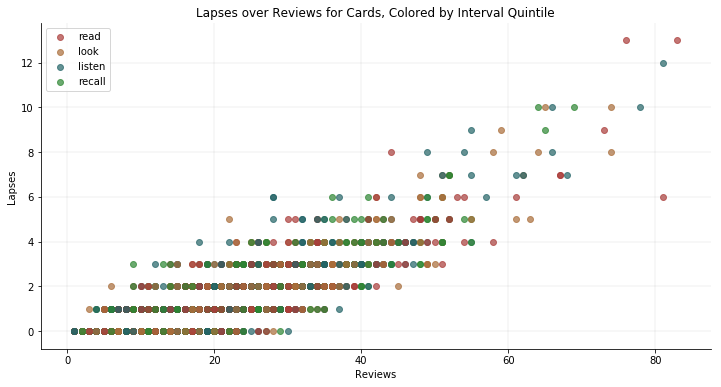

In [104]:
title = 'Lapses over Reviews for Cards, Colored by Interval Quintile'
scatterplot_tdd(df=df_cards, x='reps',y='lapses',title=title,
                x_label='Reviews',y_label='Lapses',category='cardtype')

In [316]:
def lmplot_tdd(x,y,x_label,y_label,title,hue, data,
               has_legend=True,leg_title="",leg_labels=[''],
               jitter=True, scatter_kws_s=25):
    height=6
    aspect=1.5
    fit_reg=False
    scatter_kws = {"s": scatter_kws_s}
    # to remove regression line, use fit_reg=False
    if(jitter):
        ax = sns.lmplot(x=x, y=y, height=height, aspect=aspect, data=data, 
            fit_reg=fit_reg, hue=hue, legend_out=True, scatter_kws=scatter_kws, x_jitter=.3, y_jitter=.3)
    else:
        ax = sns.lmplot(x=x, y=y, height=height, aspect=aspect, data=data,
            fit_reg=fit_reg, hue=hue, legend_out=True, scatter_kws=scatter_kws, x_jitter=0, y_jitter=0)
    ax.set(xlabel=x_label, ylabel=y_label)
    plt.title(title, loc='left', fontsize=24)
    if(has_legend):
        ax._legend.set_title(leg_title)
        for t, l in zip(ax._legend.texts, leg_labels):
            t.set_text(l)
        ax._legend.set_bbox_to_anchor((1.2,0.5))
    #if(jitter):
        
    plt.show()

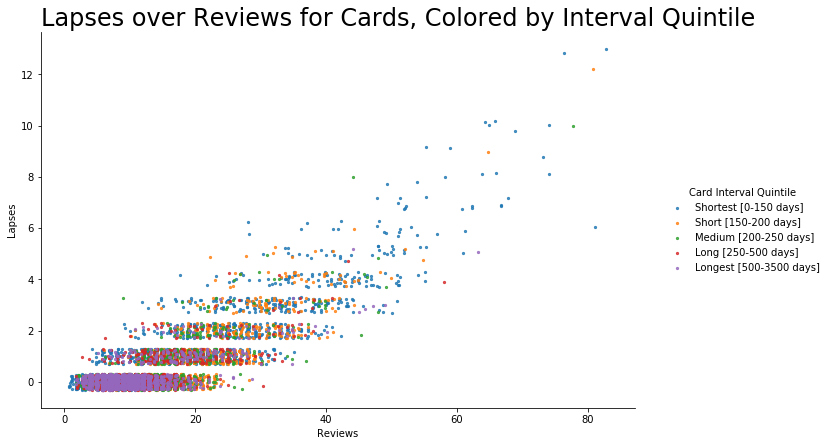

569 miliseconds


In [317]:
x = 'reps'
y = 'lapses'
x_label = 'Reviews'
y_label = 'Lapses'
hue = 'c_ivl_q'
has_legend = True
leg_title = 'Card Interval Quintile'
leg_labels = ['Shortest [0-150 days]', 'Short [150-200 days]','Medium [200-250 days]',
              'Long [250-500 days]','Longest [500-3500 days]']
title = 'Lapses over Reviews for Cards, Colored by Interval Quintile'
jitter= True
scatter_kws_s=5 # https://stackoverflow.com/questions/34796451/changing-the-marker-size-in-python-seaborn-lmplot

# https://stackoverflow.com/questions/9768865/python-nonetype-object-is-not-callable-beginner
time_it(lmplot_tdd,x,y,x_label,y_label,title,hue,df_cards,has_legend,leg_title,leg_labels,jitter,scatter_kws_s)

In [318]:
def scatter_tdd(x,y,x_label,y_label,title,hue, data,
               has_legend=True,leg_title="",leg_labels=[''],
               jitter=True, scatter_kws_s=25):
    g = sns.FacetGrid(data, col=hue)
    height=6
    aspect=1.5
    #fit_reg=False
    #scatter_kws = {"s": scatter_kws_s}
    # to remove regression line, use fit_reg=False
    #if(jitter):
    #    ax = sns.lmplot(x=x, y=y, height=height, aspect=aspect, data=data, 
    #        fit_reg=fit_reg, hue=hue, legend_out=True, scatter_kws=scatter_kws, x_jitter=.3, y_jitter=.3)
    #else:
    #    ax = sns.lmplot(x=x, y=y, height=height, aspect=aspect, data=data,
    #        fit_reg=fit_reg, hue=hue, legend_out=True, scatter_kws=scatter_kws, x_jitter=0, y_jitter=0)
    
    plt.title(title, loc='left', fontsize=24)
    
    #if(has_legend):
    #    ax._legend.set_title(leg_title)
    #    for t, l in zip(ax._legend.texts, leg_labels):
    #        t.set_text(l)
    #    ax._legend.set_bbox_to_anchor((1.2,0.5))
    #if(jitter):
    g.map(plt.scatter, x, y, s=1) # height, aspect
    #g.set_aspect('auto')
    g.set(xlabel=x_label, ylabel=y_label)
    plt.show()

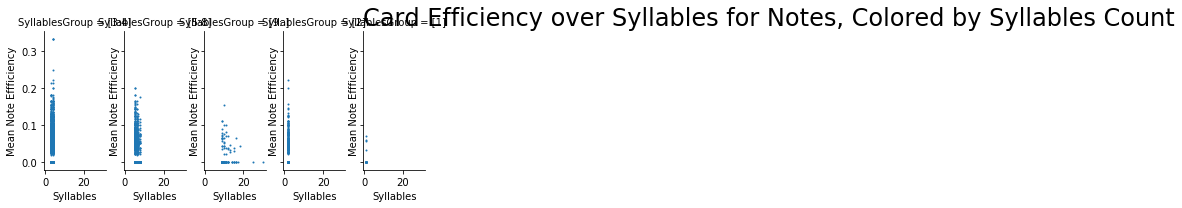

884 miliseconds


In [319]:
# Inspect the correlation between syllables and mean efficiency

x = 'Syllables'
y = 'mean_note_efficiency'
x_label = 'Syllables'
y_label = 'Mean Note Effficiency'
hue = 'SyllablesGroup'
has_legend = True
leg_title = 'Syllables Group'
leg_labels = ['[1]','[2]', '[3:4]', '[5:8]', '[9: ]']
title = 'Card Efficiency over Syllables for Notes, Colored by Syllables Count'
jitter= False
scatter_kws_s=25 # https://stackoverflow.com/questions/34796451/changing-the-marker-size-in-python-seaborn-lmplot

# https://stackoverflow.com/questions/9768865/python-nonetype-object-is-not-callable-beginner
time_it(scatter_tdd,x,y,x_label,y_label,title,hue,df_notes,has_legend,leg_title,leg_labels,jitter,scatter_kws_s)

In [320]:
"""
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(1, figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()
"""

"\nnames = ['group_a', 'group_b', 'group_c']\nvalues = [1, 10, 100]\n\nplt.figure(1, figsize=(9, 3))\n\nplt.subplot(131)\nplt.bar(names, values)\nplt.subplot(132)\nplt.scatter(names, values)\nplt.subplot(133)\nplt.plot(names, values)\nplt.suptitle('Categorical Plotting')\nplt.show()\n"

In [321]:
"""
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title
"""

"\nplt.figure(1)                # the first figure\nplt.subplot(211)             # the first subplot in the first figure\nplt.plot([1, 2, 3])\nplt.subplot(212)             # the second subplot in the first figure\nplt.plot([4, 5, 6])\n\n\nplt.figure(2)                # a second figure\nplt.plot([4, 5, 6])          # creates a subplot(111) by default\n\nplt.figure(1)                # figure 1 current; subplot(212) still current\nplt.subplot(211)             # make subplot(211) in figure1 current\nplt.title('Easy as 1, 2, 3') # subplot 211 title\n"

In [322]:
# Inspect the correlation between term legnth and mean durability

In [323]:
# Inspect the correlation between term legnth and mean efficiency

In [324]:
#make a scatterplot
#todo: give this graph a title
#todo: rename "lapses" & "reps" to be "Forgot Count" and "Review Count"
# graph 001
#todo: increase in size, make sure data points are not obscured
"""
def stuff_1():
    ax = sns.lmplot(x='reps', y='lapses', height=6, aspect=1.5, data=df_cards, 
                    fit_reg=False, #remove regression line
                    hue='c_ivl_q',
                    legend_out = True
                   )
    ax.set(xlabel='Reviews', ylabel='Lapses')
    new_title = 'Card Interval Quintile'
    ax._legend.set_title(new_title)
    
    new_labels = ['Shortest [0-150 days]', 'Short [150-200 days]','Medium [200-250 days]','Long [250-500 days]','Longest [500-3500 days]']
    for t, l in zip(ax._legend.texts, new_labels):
        t.set_text(l)
    
    # increase font size of a title
    # https://stackoverflow.com/questions/25036699/how-to-increase-plt-title-font-size/25037902
    plt.title('Lapses over Reviews for Cards,\nColored by Interval Quintile', fontsize=24)
    plt.show()
    
time_it(stuff_1)
"""

"\ndef stuff_1():\n    ax = sns.lmplot(x='reps', y='lapses', height=6, aspect=1.5, data=df_cards, \n                    fit_reg=False, #remove regression line\n                    hue='c_ivl_q',\n                    legend_out = True\n                   )\n    ax.set(xlabel='Reviews', ylabel='Lapses')\n    new_title = 'Card Interval Quintile'\n    ax._legend.set_title(new_title)\n    \n    new_labels = ['Shortest [0-150 days]', 'Short [150-200 days]','Medium [200-250 days]','Long [250-500 days]','Longest [500-3500 days]']\n    for t, l in zip(ax._legend.texts, new_labels):\n        t.set_text(l)\n    \n    # increase font size of a title\n    # https://stackoverflow.com/questions/25036699/how-to-increase-plt-title-font-size/25037902\n    plt.title('Lapses over Reviews for Cards,\nColored by Interval Quintile', fontsize=24)\n    plt.show()\n    \ntime_it(stuff_1)\n"

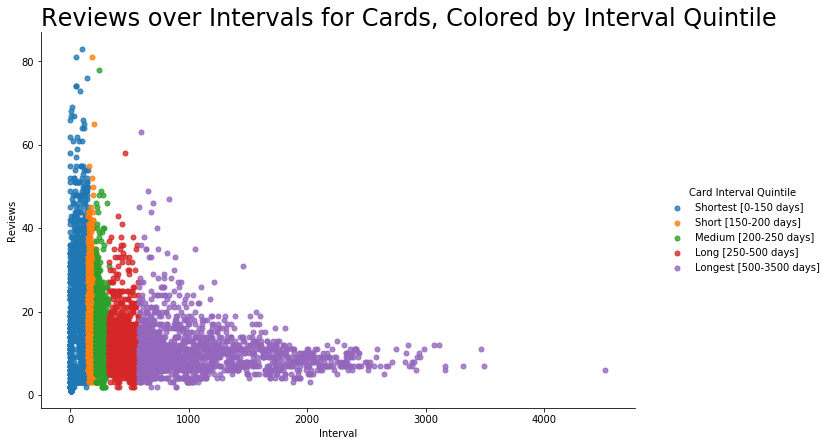

584 miliseconds


In [325]:
# graph 002
# by comparing repetition count to memory interval,
# we can assess the approx. ROI (currently called 'durability') for a card
# todo: rename ivl to "How Long The Word Will Last in Memory in Days"
# todo: color code words here by (1) learning vector, (2) in terms of timedelta since first studied, and/or (3) by certain tags such as 'animal','verb' or 'commonword'
# todo: (4) color code by word length

x = 'ivl'
y = 'reps'
x_label = 'Interval'
y_label = 'Reviews'
hue = 'c_ivl_q'
has_legend = True
leg_title = 'Card Interval Quintile'
leg_labels = ['Shortest [0-150 days]', 'Short [150-200 days]','Medium [200-250 days]',
              'Long [250-500 days]','Longest [500-3500 days]']
title = 'Reviews over Intervals for Cards, Colored by Interval Quintile'
jitter= False
scatter_kws_s=25

# https://stackoverflow.com/questions/9768865/python-nonetype-object-is-not-callable-beginner
time_it(lmplot_tdd,x,y,x_label,y_label,title,hue,df_cards,has_legend,leg_title,leg_labels,jitter,scatter_kws_s)

# Question 1:

How does the above chart compare with the variation in ease over interval? Can this be used to determine "typically memory resistant" (non-sticky) words?

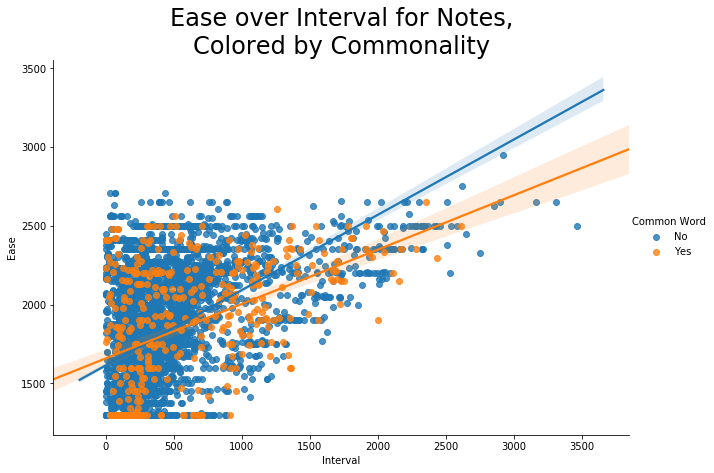

1236 miliseconds


In [326]:
# graph 003
def stuff_3():
    ax = sns.lmplot(x='mean_ivl', y='mean_factor', height=6, aspect=1.5, data=df_notes, 
                    hue='commonword'
                    #legend_out = True
                   )
    ax.set(xlabel='Interval', ylabel='Ease')
    
    new_title = 'Common Word'
    ax._legend.set_title(new_title)
    
    new_labels = ['No','Yes']
    for t, l in zip(ax._legend.texts, new_labels):
        t.set_text(l)
    
    plt.title('Ease over Interval for Notes,\nColored by Commonality', fontsize=24)
    plt.show()
    
time_it(stuff_3)

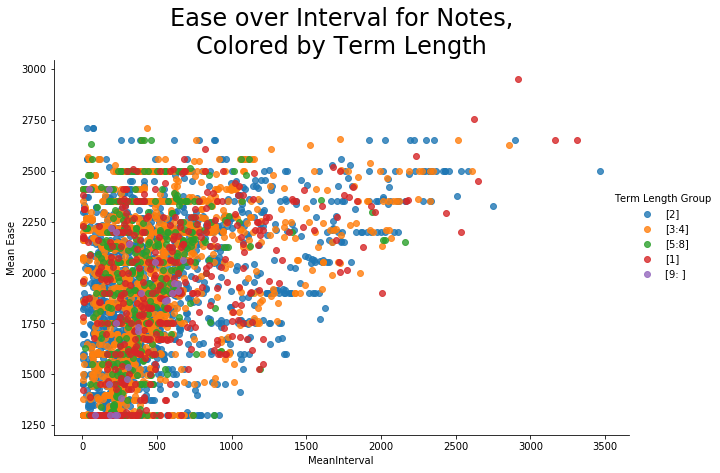

585 miliseconds


In [327]:
# graph 003
def stuff_3b():
    ax = sns.lmplot(x='mean_ivl',
                    y='mean_factor',
                    height=6, aspect=1.5, data=df_notes, 
                    fit_reg=False, #remove regression line
                    hue='TermLenGroup'
                    #legend_out = True
                   )
    ax.set(xlabel='MeanInterval', ylabel='Mean Ease')
    
    new_title = 'Term Length Group'
    ax._legend.set_title(new_title)
    
    #new_labels = ['No','Yes']
    #for t, l in zip(ax._legend.texts, new_labels):
    #    t.set_text(l)
    
    plt.title('Ease over Interval for Notes,\nColored by Term Length', fontsize=24)
    plt.show()
    
time_it(stuff_3b)

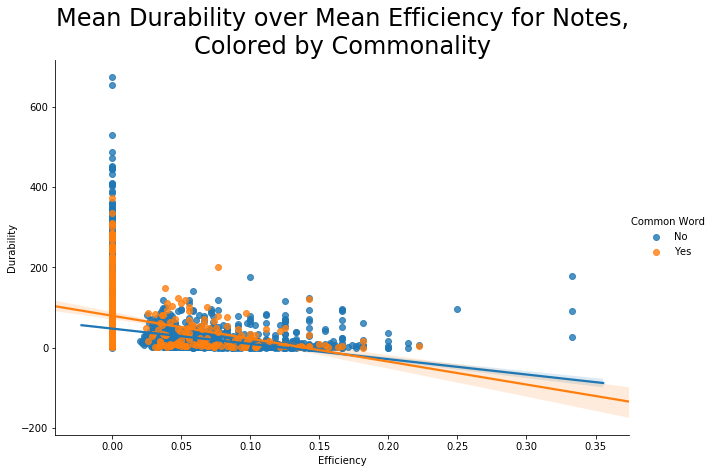

1339 miliseconds


In [328]:
# graph 003
def stuff_3a():
    ax = sns.lmplot(x='mean_note_efficiency', y='mean_note_durability', height=6, aspect=1.5, data=df_notes, 
                    hue='commonword'
                    #legend_out = True
                   ) # 'mean_note_efficiency', 'mean_note_durability','adj_note_durability'
    ax.set(xlabel='Efficiency', ylabel='Durability')
    
    new_title = 'Common Word'
    ax._legend.set_title(new_title)
    
    new_labels = ['No','Yes']
    for t, l in zip(ax._legend.texts, new_labels):
        t.set_text(l)
    
    plt.title('Mean Durability over Mean Efficiency for Notes,\nColored by Commonality', fontsize=24)
    plt.show()
    
time_it(stuff_3a)

**reps** = work done to remember a card  
**interval** = memory length as output of memorization work done  
**ease/factor** = indicator of effort to retreive & store memory  
**lapses** = result of memory deficit, a common side-effect & indicator of inefficiency of memorization efforts  

**lapses/reps ratio** (efficiency ratio) => the closer to 0, the better ("low waste"). the higher this is, the worse : "high waste"  
**interval/reps ratio** (durability ratio) = the higher the better ("low effort" / "sticky"). the lower this is, the worse ("high effort", "slippery")  

# Question 2:

What is unique (or what can we generalize) about the words that have very high repetition counts for lower (under 100) intervals?

In [329]:
# we want to understand the words conceptually: abstract vs concrete, verbs vs nouns vs adjectives
# todo: conduct data entry to add concrete boolean for each note

In [330]:
def stuff_4():
    ax = sns.lmplot(x='factor', y='ivl', height=6, aspect=1.5, data=df_cards, 
                    #fit_reg=False, #remove regression line
                    hue='cardtype',
                    legend_out = True
                   )
    ax.set(xlabel='Ease', ylabel='Interval')
    
    new_title = 'Card Type'
    ax._legend.set_title(new_title)
    
    new_labels = ['Reading','Pictoral','Listening','Translation']
    for t, l in zip(ax._legend.texts, new_labels):
        t.set_text(l)
    
    plt.title('Interval over Ease for Cards,\nColored by Card Type', fontsize=24)
    
    plt.show()

# We see work harder work associated with longer words

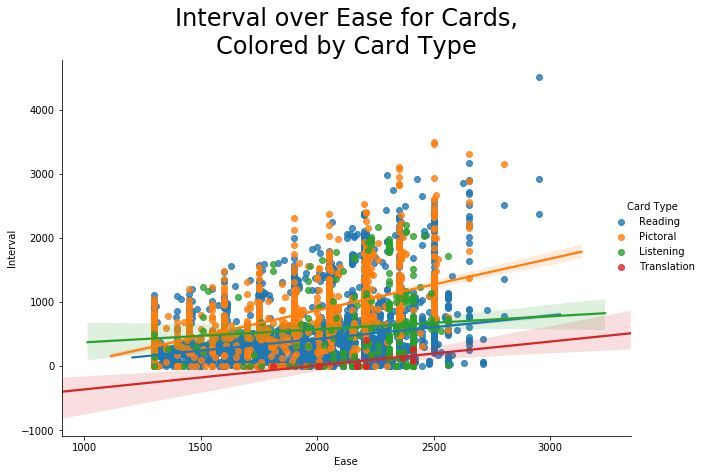

1719 miliseconds


In [331]:
time_it(stuff_4)
# todo: color code words here by (1) learning vector
# (2) in terms of timedelta since first studied,
# and/or (3) by certain tags such as 'animal','verb' or 'commonword'


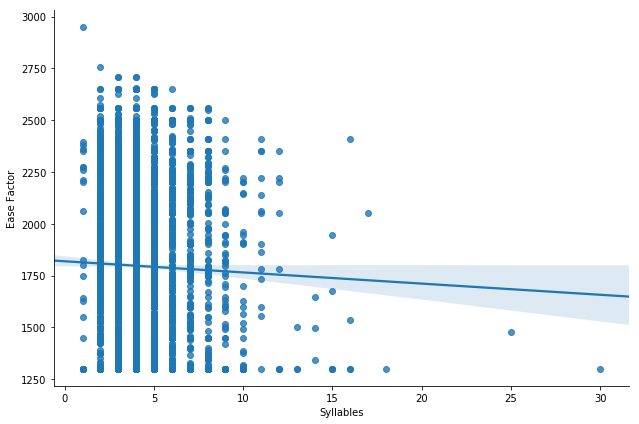

873 miliseconds


In [332]:
#time_it(sns.lmplot, x='factor', y='Syllables', data=df_binary2)

def stuff_5():
    ax = sns.lmplot(x='Syllables', y='mean_factor', height=6, aspect=1.5, data=df_notes, 
                    #fit_reg=False, #remove regression line
                    #hue='ivl_q',
                    legend_out = True
                   )
    ax.set(xlabel='Syllables', ylabel='Ease Factor')
    #new_title = 'Interval Quintile'
    #ax._legend.set_title(new_title)
    plt.show()
    
time_it(stuff_5)

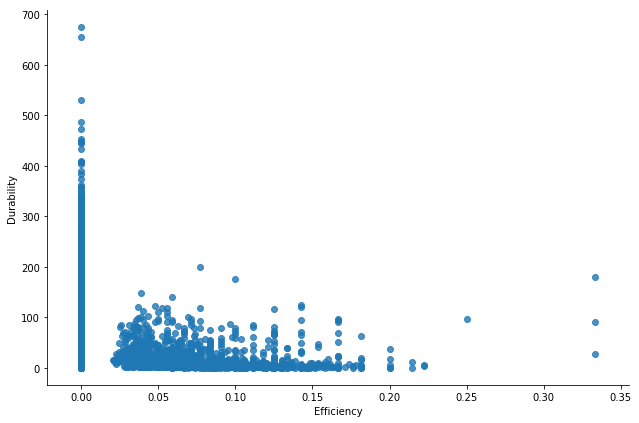

346 miliseconds


In [333]:
# graph 006 # 'mean_note_efficiency', 'mean_note_durability','adj_note_durability'
# todo: make quartile bucket for mean_ivl bucket ######
def stuff_6():
    ax = sns.lmplot(x='mean_note_efficiency', y='mean_note_durability',
                    height=6, aspect=1.5, data=df_notes,
                    fit_reg=False
                    #hue='mean_ivl'
                    #legend_out = True
                   )
    ax.set(xlabel='Efficiency', ylabel='Durability')
    #new_title = 'Card\nInterval\nQuintile'
    #ax._legend.set_title(new_title)
    plt.show()
    
time_it(stuff_6)

**reps** = work done to remember a card  
**interval** = memory length as output of memorization work done  
**ease/factor** = indicator of effort to retreive & store memory  
**lapses** = result of memory deficit, a common side-effect & indicator of inefficiency of memorization efforts  

**lapses/reps ratio** (efficiency ratio) => the closer to 0, the better ("low waste"). the higher this is, the worse : "high waste"  
**interval/reps ratio** (durability ratio) = the higher the better ("low effort" / "sticky"). the lower this is, the worse ("high effort", "slippery")  

581 miliseconds


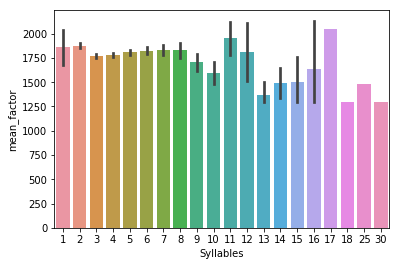

In [334]:
#fig, ax = plt.subplots(figsize=(10,10))
time_it(sns.barplot, x='Syllables', y='mean_factor', data=df_notes)

242 miliseconds


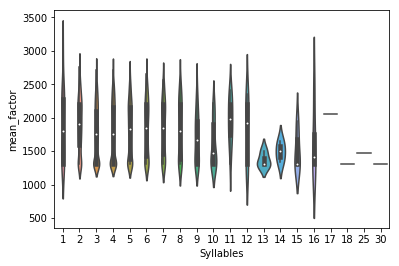

In [335]:
#fig, ax = plt.subplots(figsize=(18,8))
time_it(sns.violinplot, x='Syllables', y='mean_factor', data=df_notes)
#time_it(sns.swarmplot, x='Syllables',
#              y='factor',
#              data=df_binary2, #make points black
#              color="k",
#              alpha=0.5) #slightly transparent"""

82 miliseconds


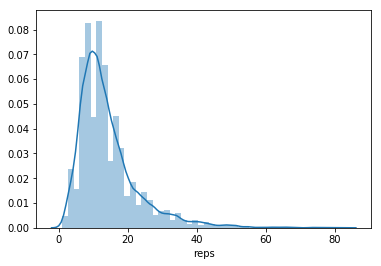

In [336]:
#create a histogram of the distribution of repetitions
time_it(sns.distplot, df_cards.reps)

49 miliseconds


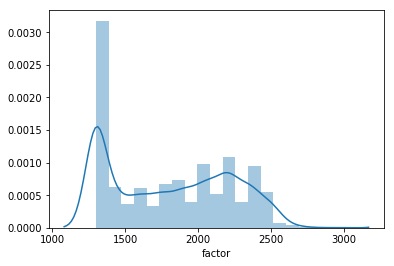

In [337]:
#create a histogram of the distribution of ease
time_it(sns.distplot, df_cards.factor)

84 miliseconds


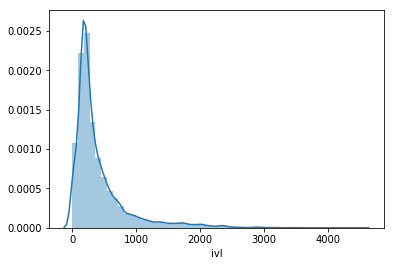

In [338]:
#create a histogram of the distribution of intervals
time_it(sns.distplot, df_cards.ivl)

In [339]:
df_notes.loc[df_notes['Syllables']>16]

,nid,tags,Term,Yomi1,NoteCreated,LastModified,commonword,clothing,animal,body,...,mean_lapses,total_reps,total_lapses,hasListenCard,hasPictureCard,hasReadCard,hasTranslateCard,mean_note_efficiency,mean_note_durability,adj_note_durability
234,1346057958628,kanji history inspect fromnewspaper culture fr...,東京電力福島・第１原発事故,とうきょうでんりょくふくしま・だいいちげんぱつじこ,2012-08-27 08:59:18.628,2019-05-13 20:00:43.000,0,0,0,0,...,0.0,18,0,0,0,1,0,0.000000,16.555556,16.555556
301,1346215143756,numeric datesandtime,1837～1901年,せんはっぴゃくさんじゅうななねんからせんきゅうひゃくいちねん,2012-08-29 04:39:03.756,2019-05-13 20:58:19.000,0,0,0,0,...,0.0,14,0,0,0,1,0,0.000000,15.714286,15.714286
414,1346216471844,kanji datesandtime counter fromdict numeric,千九百八十九年,せんきゅうひゃくはちじゅうきゅうねん,2012-08-29 05:01:11.844,2019-05-13 20:00:43.000,0,0,0,0,...,1.0,23,1,0,0,1,0,0.043478,10.913043,10.913043
5748,1387411183585,numeric kanji datesandtime,千九百八十七年,せんきゅうひゃくはちじゅうななねん,2013-12-18 23:59:43.585,2019-05-13 20:00:52.000,0,0,0,0,...,0.0,11,0,0,0,1,0,0.000000,28.090909,28.090909


660 miliseconds


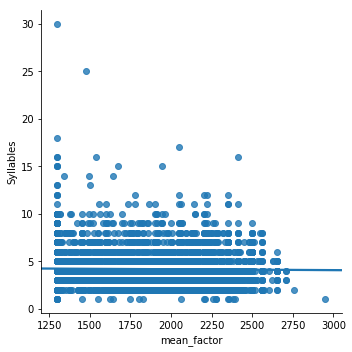

In [340]:
#make a scatterplot
time_it(sns.lmplot, x='mean_factor', y='Syllables', data=df_notes)

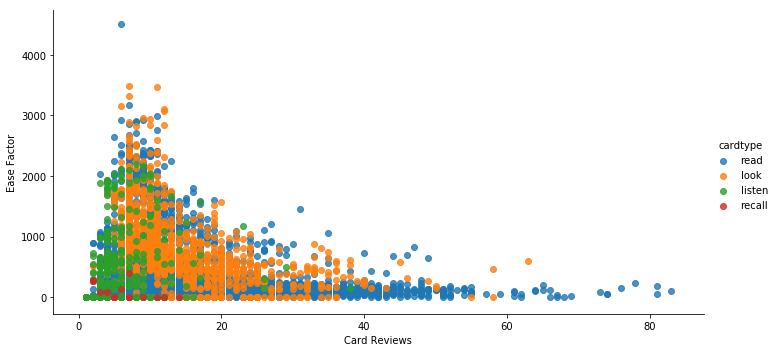

526 miliseconds


In [341]:
#todo: increase in size, make sure data points are not obscured
def stuff_a():
    ax = sns.lmplot(x='reps', y='ivl', height=5, aspect=2, data=df_cards, 
                    fit_reg=False, #remove regression line
                    hue='cardtype',
                    legend_out = True
                   )
    ax.set(xlabel='Card Reviews', ylabel='Ease Factor')
    #new_title = 'Card Vectors'
    #ax._legend.set_title(new_title)
    plt.show()
    
time_it(stuff_a)

215 miliseconds


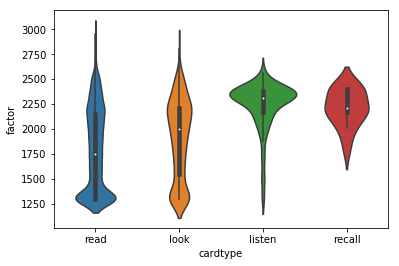

In [342]:
#fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
time_it(sns.violinplot, x="cardtype", y="factor", data=df_cards)

106 miliseconds


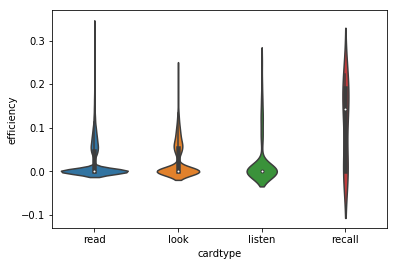

In [343]:
#fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
time_it(sns.violinplot, x="cardtype", y="efficiency", data=df_cards)

139 miliseconds


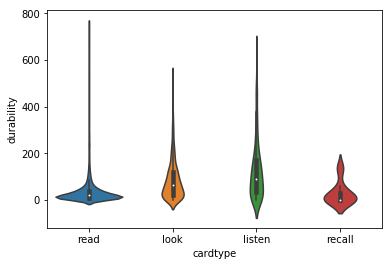

In [344]:
#fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
time_it(sns.violinplot, x="cardtype", y="durability", data=df_cards)

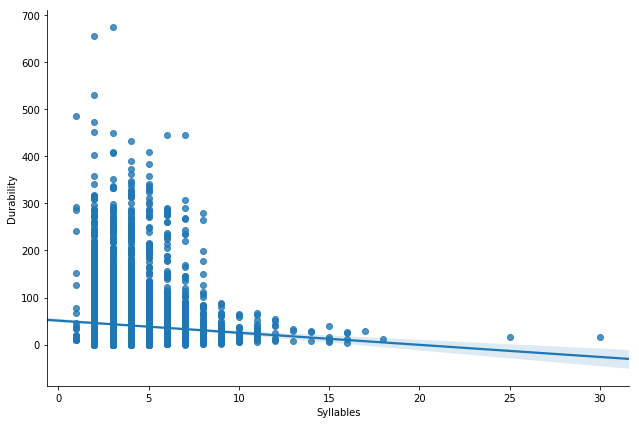

882 miliseconds


In [345]:
# graph 007 # 'mean_note_efficiency', 'mean_note_durability','adj_note_durability'
def stuff_7():
    ax = sns.lmplot(x='Syllables', y='mean_note_durability',
                    height=6, aspect=1.5, data=df_notes
                    #fit_reg=False
                    #hue='mean_ivl'
                    #legend_out = True
                   )
    ax.set(xlabel='Syllables', ylabel='Durability')
    #new_title = 'Card\nInterval\nQuintile'
    #ax._legend.set_title(new_title)
    plt.show()
    
time_it(stuff_7)

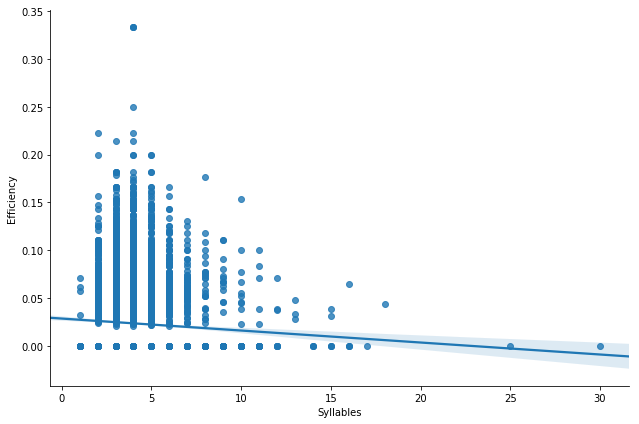

838 miliseconds


In [346]:
# graph 008
def stuff_8():
    ax = sns.lmplot(x='Syllables', y='mean_note_efficiency',
                    height=6, aspect=1.5, data=df_notes
                    #fit_reg=False
                    #hue='mean_ivl'
                    #legend_out = True
                   )
    ax.set(xlabel='Syllables', ylabel='Efficiency')
    #new_title = 'Card\nInterval\nQuintile'
    #ax._legend.set_title(new_title)
    plt.show()
    
time_it(stuff_8)

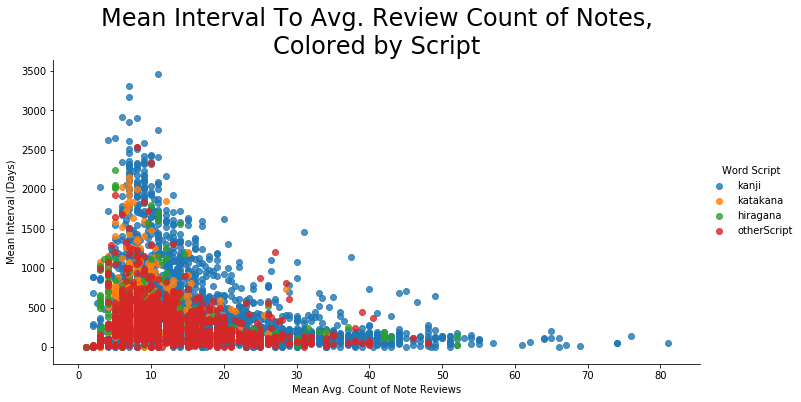

533 miliseconds


In [347]:
#todo: increase in size, make sure data points are not obscured
def stuff_b():
    ax = sns.lmplot(x='mean_reps', y='mean_ivl', height=5, aspect=2, data=df_notes, 
                    fit_reg=False, #remove regression line
                    hue='script',
                    legend_out = True
                   )
    ax.set(xlabel='Mean Avg. Count of Note Reviews', ylabel='Mean Interval (Days)')
    new_title = 'Word Script'
    ax._legend.set_title(new_title)
    plt.title('Mean Interval To Avg. Review Count of Notes,\nColored by Script', fontsize=24)
    plt.show()
    
time_it(stuff_b)

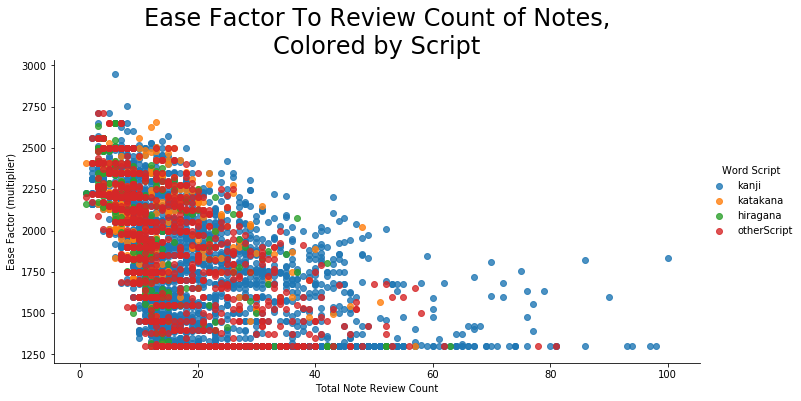

544 miliseconds


In [348]:
#todo: increase in size, make sure data points are not obscured
def stuff_d():
    ax = sns.lmplot(x='total_reps', y='mean_factor', height=5, aspect=2, data=df_notes, 
                    fit_reg=False, #remove regression line
                    hue='script',
                    legend_out = True
                   )
    ax.set(xlabel='Total Note Review Count', ylabel='Ease Factor (multiplier)')
    new_title = 'Word Script'
    ax._legend.set_title(new_title)
    plt.title('Ease Factor To Review Count of Notes,\nColored by Script', fontsize=24)
    plt.show()
    
time_it(stuff_d)

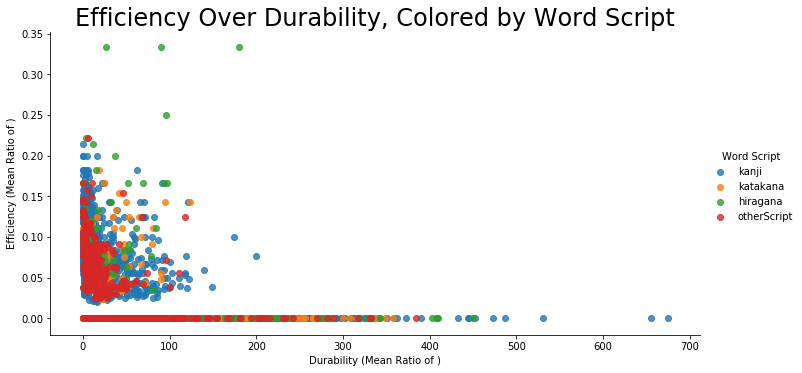

519 miliseconds


In [349]:
#todo: increase in size, make sure data points are not obscured
# 'mean_note_efficiency', 'mean_note_durability','adj_note_durability'
def stuff_c():
    ax = sns.lmplot(x='mean_note_durability', y='mean_note_efficiency', height=5, aspect=2, data=df_notes, 
                    fit_reg=False, #remove regression line
                    hue='script',
                    legend_out = True
                   )
    ax.set(xlabel='Durability (Mean Ratio of )', ylabel='Efficiency (Mean Ratio of )')
    new_title = 'Word Script'
    ax._legend.set_title(new_title)
    plt.title('Efficiency Over Durability, Colored by Word Script', fontsize=24)
    plt.show()
    
time_it(stuff_c)

In [350]:
# https://stackoverflow.com/questions/45201514/edit-seaborn-legend/45211976